In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload() #get kaggle API token and upload kaggle.JSON. https://www.kaggle.com/general/51898

{}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18327  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10998  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5599  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3909  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
! kaggle competitions download -c 'g-research-crypto-forecasting'

  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 133kB/s]
100% 660k/660k [00:00<00:00, 4.56MB/s]

100% 1.02G/1.02G [00:18<00:00, 54.8MB/s]
100% 1.02G/1.02G [00:18<00:00, 58.2MB/s]
  0% 0.00/444 [00:00<?, ?B/s]
100% 444/444 [00:00<00:00, 434kB/s]
  0% 0.00/406 [00:00<?, ?B/s]
100% 406/406 [00:00<00:00, 403kB/s]
  0% 0.00/5.78k [00:00<?, ?B/s]
100% 5.78k/5.78k [00:00<00:00, 5.41MB/s]
 99% 93.0M/94.2M [00:03<00:00, 27.6MB/s]
100% 94.2M/94.2M [00:03<00:00, 26.2MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  supplemental_train.csv.zip
  inflating: supplemental_train.csv  

Archive:  train.csv.zip
  inflating: train.csv               

2 archives were successfully processed.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
overallfirstTS = df.iloc[0].timestamp
overalllastTS = df.iloc[-1].timestamp
overallRangeTS = overalllastTS - overallfirstTS
for i in range(0,14):
  testdf = df.loc[df['Asset_ID'] == i]
  firstTS = testdf.iloc[0].timestamp
  lastTS = testdf.iloc[-1].timestamp
  start = (firstTS-overallfirstTS)/overallRangeTS
  finish = (lastTS-overallfirstTS)/overallRangeTS
  print(len(testdf),start,finish)

1942619 0.0 1.0
1956282 0.0 1.0
1953537 0.0 1.0
1791867 0.07827961648659987 1.0
1156866 0.34334546610327554 1.0
1955140 0.0 1.0
1956200 0.0 1.0
1951127 0.0 1.0
1592071 0.094435294760902 1.0
1956030 0.0 1.0
670497 0.09539290296832995 1.0
1701261 0.0 1.0
1778749 0.034580182824474094 1.0
1874560 0.02715233175554521 1.0


In [ ]:
def createSubset(start, end, dataFrame):
  startIndex = int(start*len(dataFrame))
  endIndex = int(end*len(dataFrame))
  return dataFrame[startIndex:endIndex]

In [ ]:
def fillNaN(dataFrame):
  currencyDFs = []
  for Asset_ID in dataFrame.Asset_ID.unique():
    singleCurrencyDF = dataFrame.loc[dataFrame['Asset_ID'] == Asset_ID]
    singleCurrencyDF = singleCurrencyDF.ffill().bfill()
    currencyDFs.append(singleCurrencyDF)
  return pd.concat(currencyDFs).sort_index()

In [ ]:
def removeFirstLast(dataFrame): #removes potentially incomplete rows associated with first and last timestamp
  timestamps = dataFrame.timestamp.unique()
  dataFrame = dataFrame.loc[dataFrame['timestamp'] > timestamps[0]]
  dataFrame = dataFrame.loc[dataFrame['timestamp'] < timestamps[-1]]
  return dataFrame

In [ ]:
def createVWAPArray(dataFrame, currencies = 14):
  firstTimestamp = dataFrame['timestamp'].iloc[0]
  lastTimestamp = dataFrame['timestamp'].iloc[-1]
  singleCurrencyVWAPSet = []
  for i in range(currencies):
    print("currency_index",i)
    singleCurrencyVWAP = []
    singleCurrencyDF = dataFrame.loc[dataFrame['Asset_ID'] == i]
    singleCurrencyFirstTimestamp = singleCurrencyDF['timestamp'].iloc[0]
    singleCurrencyFirstVWAP = singleCurrencyDF['VWAP'].iloc[0]
    
    for timestamp in range(firstTimestamp,lastTimestamp+1,60):
      if timestamp < singleCurrencyFirstTimestamp:
        singleCurrencyVWAP.append(singleCurrencyFirstVWAP)
      else:
        timestampVWAP = singleCurrencyDF.loc[singleCurrencyDF['timestamp']==timestamp]['VWAP']
        if timestampVWAP.empty:
          singleCurrencyVWAP.append(singleCurrencyVWAP[-1])
        else:
          singleCurrencyVWAP.append(timestampVWAP)
    singleCurrencyVWAPSet.append(np.array(singleCurrencyVWAP))
  VWAPArray = np.column_stack(singleCurrencyVWAPSet)
  return VWAPArray

In [ ]:
df3 = createSubset(0.5,0.53,df) #Creating smaller dataset arbitrarily from 50% point to 53% point 

In [ ]:
df3 = fillNaN(df3) #removing NaN values

NameError: ignored

In [ ]:
df3 = removeFirstLast(df3) #removing partially incomplete data at first and last timesteps

In [ ]:
df3.to_pickle("df3.pkl")

In [ ]:
df3 = pd.read_pickle("df3.pkl")

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
12118405,1578371940,3,38.0,0.037255,0.037285,0.037199,0.037210,130363.902898,0.037235,0.000182
12118406,1578371940,2,152.0,240.746667,240.900000,240.390000,240.588333,326.758028,240.671361,0.002916
12118407,1578371940,0,36.0,14.798700,14.817600,14.798700,14.810300,1113.510000,14.803975,-0.004416
12118408,1578371940,1,623.0,7865.482857,7873.990000,7855.900000,7863.590232,122.305297,7864.273296,-0.001082
12118409,1578371940,4,6.0,0.002148,0.002151,0.002146,0.002148,71992.650000,0.002149,-0.002282
...,...,...,...,...,...,...,...,...,...,...
12845495,1581798180,8,63.0,0.292400,0.297600,0.290500,0.293300,18758.509800,0.293609,-0.001023
12845496,1581798180,9,123.0,76.620400,76.790000,76.585000,76.672000,502.574597,76.665520,-0.000269
12845497,1581798180,13,165.0,0.023621,0.023655,0.023603,0.023642,603668.575700,0.023627,0.004132
12845498,1581798180,12,92.0,0.079266,0.079450,0.079214,0.079311,191279.989951,0.079308,0.000834


In [ ]:
df3_VWAP_Array = createVWAPArray(df3) #creating numpy array of size (timestamps,currency indices)

currency_index 0
currency_index 1
currency_index 2
currency_index 3
currency_index 4
currency_index 5
currency_index 6
currency_index 7
currency_index 8
currency_index 9
currency_index 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


currency_index 11
currency_index 12
currency_index 13


In [ ]:
np.save('df3_VWAP_Array.npy', df3_VWAP_Array)

In [ ]:
df3_VWAP_Array = np.load('df3_VWAP_Array.npy', allow_pickle=True)

In [ ]:
df3_VWAP_Array

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3_VWAP_Array_Normalized = scaler.fit_transform(df3_VWAP_Array) #Normalizing

In [ ]:
#Creating 65-35 train/test split
training_size_finish=int(len(df3_VWAP_Array_Normalized)*0.65)
train_data,test_data=df3_VWAP_Array_Normalized[0:training_size_finish,:],df3_VWAP_Array_Normalized[training_size_finish:,:]

In [ ]:
#creating train/test datasets. Previous is the number of timesteps in each input. Advance is the number of timesteps ahead to predict
def create_dataset2(dataset, previous, advance):
    dataX, dataY = [], []
    for i in range(len(dataset)-previous-advance+1):
        a = dataset[i:(i+previous), ]
        dataX.append(a)
        dataY.append(dataset[i + previous + advance - 1, ])
    return np.array(dataX), np.array(dataY)
previous = 100
advance = 15
X_train, y_train = create_dataset2(train_data, previous, advance)
X_test, ytest = create_dataset2(test_data, previous, advance)

In [ ]:
X_train.shape

(37004, 100, 14)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,14)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(14))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           13000     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 14)                714       
                                                                 
Total params: 54,114
Trainable params: 54,114
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)
model.save('VWAP_Subset_Model.h5')

Epoch 1/30
579/579 [==============================] - 50s 86ms/step - loss: 0.0013 - val_loss: 0.0403
Epoch 2/30
579/579 [==============================] - 48s 83ms/step - loss: 1.7591e-04 - val_loss: 0.0324
Epoch 3/30
579/579 [==============================] - 48s 83ms/step - loss: 1.4106e-04 - val_loss: 0.0284
Epoch 4/30
579/579 [==============================] - 48s 82ms/step - loss: 1.3020e-04 - val_loss: 0.0239
Epoch 5/30
579/579 [==============================] - 48s 83ms/step - loss: 1.2185e-04 - val_loss: 0.0225
Epoch 6/30
579/579 [==============================] - 48s 83ms/step - loss: 1.1750e-04 - val_loss: 0.0198
Epoch 7/30
579/579 [==============================] - 48s 83ms/step - loss: 1.1775e-04 - val_loss: 0.0188
Epoch 8/30
579/579 [==============================] - 48s 83ms/step - loss: 1.1307e-04 - val_loss: 0.0175
Epoch 9/30
579/579 [==============================] - 48s 83ms/step - loss: 1.0776e-04 - val_loss: 0.0182
Epoch 10/30
579/579 [=============================

In [ ]:
import tensorflow as tf
VWAP_Subset_Model = tf.keras.models.load_model("VWAP_Subset_Model.h5")

In [ ]:
train_predict_Normalized=VWAP_Subset_Model.predict(X_train)
test_predict_Normalized=VWAP_Subset_Model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict_Normalized)
test_predict=scaler.inverse_transform(test_predict_Normalized)

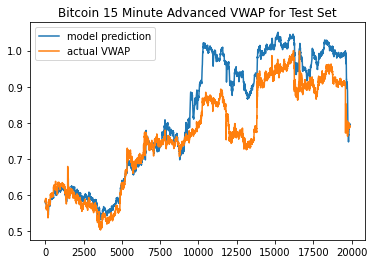

In [ ]:
from matplotlib import pyplot as plt
plt.plot(test_predict_Normalized[:,1],label='model prediction') #bitcoin normalized model prediciton
plt.plot(ytest[:,1],label = 'actual VWAP')#bitcoin normalized testset actual data
plt.legend()
plt.title('Bitcoin 15 Minute Advanced VWAP for Test Set')
plt.show()